In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,precision_score,f1_score,classification_report,roc_auc_score,roc_curve,precision_recall_curve,confusion_matrix
from imblearn.over_sampling import SMOTENC,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("churn.csv")

In [3]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [4]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [5]:
df['Geography']=df['Geography'].astype("category")
df['Gender']=df['Gender'].astype("category")
df['IsActiveMember']=df['IsActiveMember'].astype("category")
df['HasCrCard']=df['HasCrCard'].astype("category")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(4), float64(2), int64(5)
memory usage: 586.6 KB


In [7]:
df1=pd.get_dummies(df,drop_first=True)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   EstimatedSalary    10000 non-null  float64
 6   Exited             10000 non-null  int64  
 7   Geography_Germany  10000 non-null  uint8  
 8   Geography_Spain    10000 non-null  uint8  
 9   Gender_Male        10000 non-null  uint8  
 10  HasCrCard_1        10000 non-null  uint8  
 11  IsActiveMember_1   10000 non-null  uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 595.8 KB


In [9]:
y=df1['Exited']
X=df1.drop("Exited",axis=1)

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print('Shape of X_train is: ',X_train.shape)
print('Shape of X_test is: ',X_test.shape)
print('Shape of y_train is: ',y_train.shape)
print('Shape of y_test is: ',y_test.shape)

Shape of X_train is:  (8000, 11)
Shape of X_test is:  (2000, 11)
Shape of y_train is:  (8000,)
Shape of y_test is:  (2000,)


In [ ]:
LogisticRegression()

In [11]:
def learning_curves(estimator,features,target,train_sizes,cv):
    train_sizes,train_scores,validation_scores=learning_curve(estimator,features,target,train_sizes=train_sizes,cv=cv,scoring='f1',n_jobs=-1)
    train_scores_mean=train_scores.mean(axis=1)
    val_scores_mean=validation_scores.mean(axis=1)
    plt.plot(train_sizes,train_scores_mean,label='Training score',color='red')
    plt.plot(train_sizes,val_scores_mean,label='Validation score',color='blue')
    plt.legend()

## Logistic Regression Model

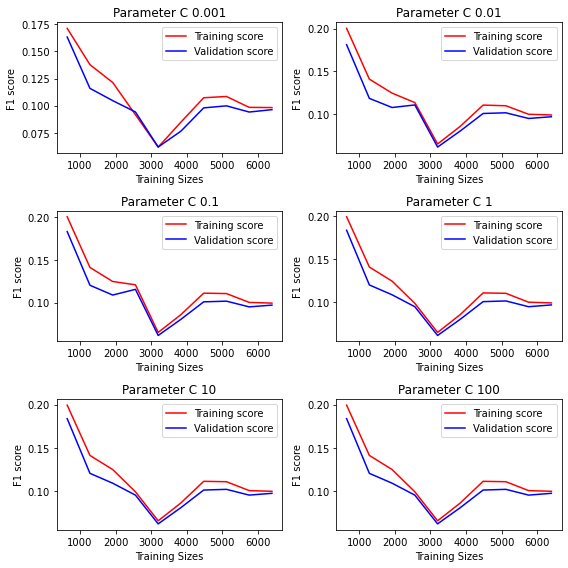

In [12]:
plt.figure(figsize=(8,8))
for i,c in enumerate([0.001,0.01,0.1,1,10,100]):
    plt.subplot(3,2,i+1)
    learning_curves(LogisticRegression(C=c),X_train,y_train,np.linspace(0.1,1,10),5)
    plt.title("Parameter C {}".format(c))
    plt.xlabel("Training Sizes")
    plt.ylabel("F1 score")
    plt.tight_layout()

## Logistic Regression after standardization

In [16]:
X_train_stand=X_train.values
X_test_stand=X_test.values
sc = StandardScaler()
X_train_stand[:,0:6] = sc.fit_transform(X_train.values[:,0:6])
X_test_stand[:,0:6] = sc.transform(X_test.values[:,0:6])

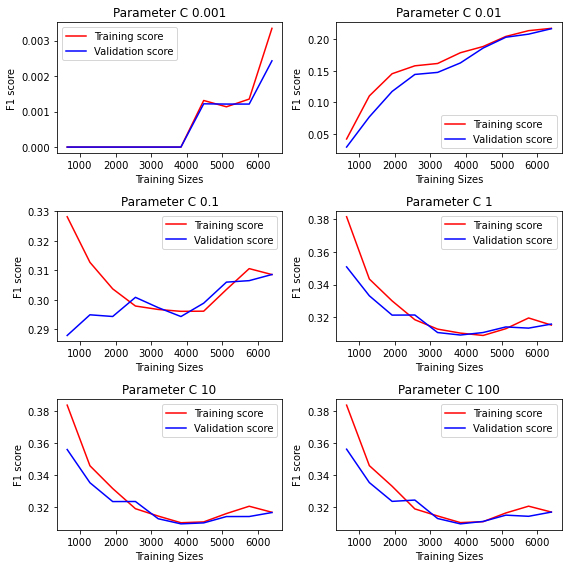

In [15]:
plt.figure(figsize=(8,8))
for i,c in enumerate([0.001,0.01,0.1,1,10,100]):
    plt.subplot(3,2,i+1)
    learning_curves(LogisticRegression(C=c),X_train_stand,y_train,np.linspace(0.1,1,10),5)
    plt.title("Parameter C {}".format(c))
    plt.xlabel("Training Sizes")
    plt.ylabel("F1 score")
    plt.tight_layout()

In [21]:
logreg=LogisticRegression(C=0.1,random_state=42)
logreg.fit(X_train_stand,y_train)
y_lr=logreg.predict(X_test_stand)
print(classification_report(y_test,y_lr))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [22]:
print("Training F1 score is {}".format(f1_score(y_train,logreg.predict(X_train_stand))))
print("Testing F1 score is {}".format(f1_score(y_test,y_lr)))

Training F1 score is 0.3167870036101083
Testing F1 score is 0.2835820895522388


In [21]:
coeff=pd.DataFrame({"Features":X.columns.tolist(),"Coefficients":logreg.coef_[0]})
coeff.sort_values(ascending=False,by='Coefficients')

,Features,Coefficients
1,Age,0.649337
6,Geography_Germany,0.544443
3,Balance,0.186169
5,EstimatedSalary,0.044689
2,Tenure,-0.013724
7,Geography_Spain,-0.042151
9,HasCrCard_1,-0.045758
4,NumOfProducts,-0.059142
0,CreditScore,-0.077962
8,Gender_Male,-0.385892


<AxesSubplot:xlabel='Features', ylabel='Coefficients'>

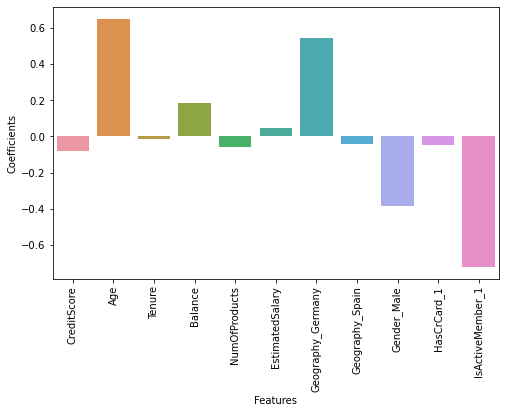

In [22]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(coeff.Features,coeff.Coefficients)

## Decision Tree Model Pruning

In [23]:
#Cost Complexity Pruning for decision tree model with hyperparameter tuning
DT_Model = DecisionTreeClassifier(criterion='entropy', max_depth=16, max_features='sqrt',
                                  min_samples_leaf=29, min_samples_split=15,random_state=42)
path = DT_Model.cost_complexity_pruning_path(X_train, y_train)
alphas = path['ccp_alphas']

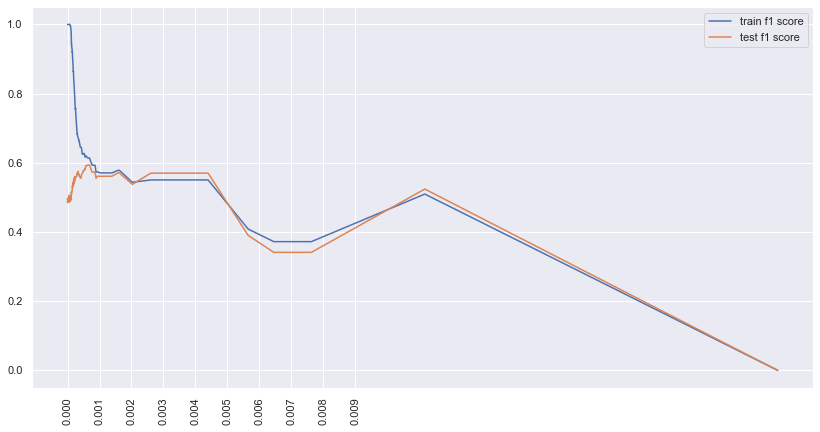

In [24]:
f1score_train, f1score_test = [],[]

for i in alphas:
    DT_Model = DecisionTreeClassifier(ccp_alpha=i)
    DT_Model.fit(X_train,y_train)
    y_train_pred = DT_Model.predict(X_train)
    y_test_pred = DT_Model.predict(X_test)
    
    f1score_train.append(f1_score(y_train,y_train_pred))
    f1score_test.append(f1_score(y_test,y_test_pred))
    
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=f1score_train,x=alphas,label = "train f1 score")
sns.lineplot(y=f1score_test,x=alphas,label = "test f1 score")
#plt.xticks(ticks = np.arange(0.00,0.03,0.01))            
plt.xticks(ticks = np.arange(0.00,0.01,0.001),rotation = 90)
plt.show()

In [25]:
DT_Model_prune = DecisionTreeClassifier(criterion='entropy', max_depth=16, max_features='sqrt',
                                  min_samples_leaf=29, min_samples_split=15,
                                 ccp_alpha = 0.0005,random_state=42)
DT_Model_prune.fit(X_train,y_train)
y_train_pred = DT_Model_prune.predict(X_train)
y_test_pred = DT_Model_prune.predict(X_test)

print(f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred))

0.5164750957854406 0.5131375579598146


In [29]:
#Pruning with default parameters of decision tree except random state and ccp_alpha
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train,y_train)
path = DT_Model.cost_complexity_pruning_path(X_train, y_train)
alphas = path['ccp_alphas']

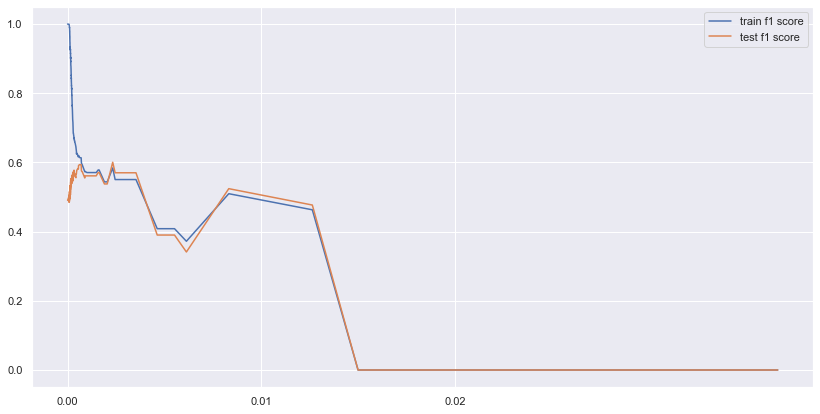

In [30]:
f1score_train, f1score_test = [],[]

for i in alphas:
    tree = DecisionTreeClassifier(ccp_alpha=i)
    tree.fit(X_train,y_train)
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    f1score_train.append(f1_score(y_train,y_train_pred))
    f1score_test.append(f1_score(y_test,y_test_pred))
    
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=f1score_train,x=alphas,label = "train f1 score")
sns.lineplot(y=f1score_test,x=alphas,label = "test f1 score")
plt.xticks(ticks = np.arange(0.00,0.03,0.01))            
#plt.xticks(ticks = np.arange(0.00,0.01,0.001),rotation = 90)
plt.show()

In [33]:
DT_Model_prune = DecisionTreeClassifier(ccp_alpha = 0.0005,random_state=42)
DT_Model_prune.fit(X_train,y_train)
y_train_pred = DT_Model_prune.predict(X_train)
y_test_pred = DT_Model_prune.predict(X_test)

print(f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred))

0.626843657817109 0.577319587628866


## Random Forest Model

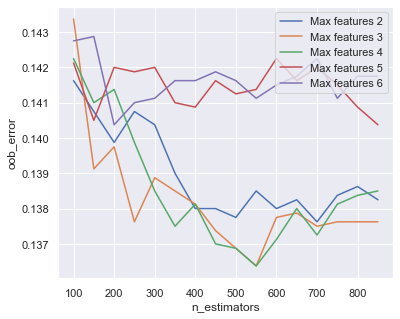

In [30]:
#Random Forest using oob_score
plt.figure(figsize=(6,5))
trees=list(np.arange(100,900,50))
for j in range(2,7):
    error=[]
    for i in trees:
        clf=RandomForestClassifier(max_features=j,n_estimators=i,oob_score=True,random_state=42,n_jobs=-1)
        clf.fit(X_train,y_train)
        oob_error=1-clf.oob_score_
        error.append(oob_error)
    plt.plot(trees,error,label='Max features {}'.format(j))
    plt.xlabel("n_estimators")
    plt.ylabel("oob_error")
    plt.legend(loc='upper right')
plt.show()

In [12]:
rf=RandomForestClassifier(max_features=3,random_state=42,n_estimators=700)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
y_pred_prob=rf.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.47      0.59       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



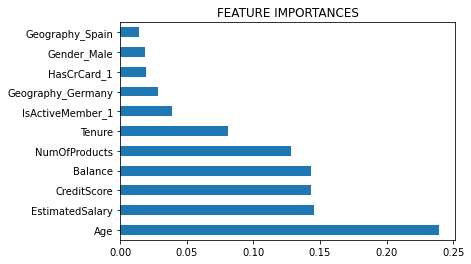

In [13]:
print(classification_report(y_test,y_pred))
feat_imp=pd.Series(rf.feature_importances_,index=X_train.columns)
plt.title("FEATURE IMPORTANCES")
feat_imp.nlargest(11).plot(kind='barh')
plt.show()

## Plotting Precision Recall curves for all 3 models

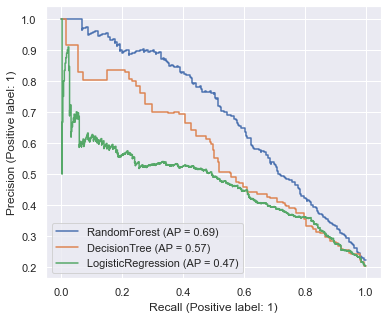

In [34]:
plt.figure(figsize=(6,5))
plot_precision_recall_curve(rf,X_test,y_test,ax=plt.gca(),name='RandomForest')
plot_precision_recall_curve(DT_Model_prune,X_test,y_test,ax=plt.gca(),name='DecisionTree')
plot_precision_recall_curve(logreg,X_test_stand,y_test,ax=plt.gca(),name='LogisticRegression')
plt.show()

# Balancing the classes

## Under Sampling

In [35]:
undersampling=RandomUnderSampler(sampling_strategy='majority',random_state=999)
X_under,y_under=undersampling.fit_resample(X_train,y_train)

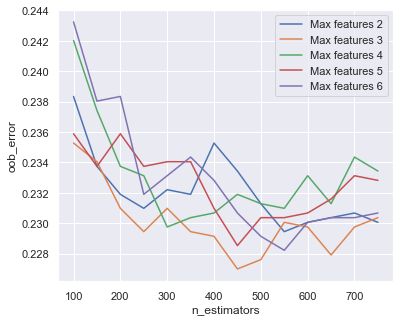

Wall time: 2min 37s


In [36]:
%%time
plt.figure(figsize=(6,5))
trees=list(np.arange(100,800,50))
for j in range(2,7):
    error=[]
    for i in trees:
        clf=RandomForestClassifier(max_features=j,n_estimators=i,oob_score=True,random_state=42,n_jobs=-1)
        clf.fit(X_under,y_under)
        oob_error=1-clf.oob_score_
        error.append(oob_error)
    plt.plot(trees,error,label='Max features {}'.format(j))
    plt.xlabel("n_estimators")
    plt.ylabel("oob_error")
    plt.legend(loc='upper right')
plt.show()

In [38]:
rf=RandomForestClassifier(max_features=3,random_state=42,n_estimators=450)
rf.fit(X_under,y_under)
y_pred=rf.predict(X_test)
y_pred_prob=rf.predict_proba(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1593
           1       0.48      0.75      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000



In [39]:
print("Training F1 score is {}".format(f1_score(y_under,rf.predict(X_under))))
print("Testing F1 score is {}".format(f1_score(y_test,y_pred)))

Training F1 score is 1.0
Testing F1 score is 0.5830959164292498


## Over Sampling

In [40]:
oversampling=RandomOverSampler(sampling_strategy='minority',random_state=66)
X_over,y_over=oversampling.fit_resample(X_train,y_train)

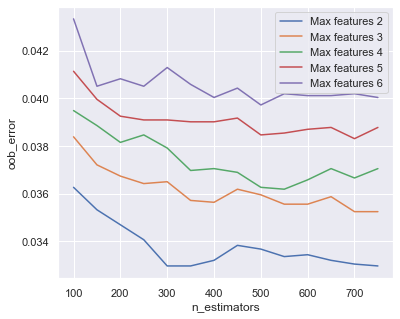

Wall time: 5min 11s


In [41]:
%%time
plt.figure(figsize=(6,5))
trees=list(np.arange(100,800,50))
for j in range(2,7):
    error=[]
    for i in trees:
        clf=RandomForestClassifier(max_features=j,n_estimators=i,oob_score=True,random_state=42,n_jobs=-1)
        clf.fit(X_over,y_over)
        oob_error=1-clf.oob_score_
        error.append(oob_error)
    plt.plot(trees,error,label='Max features {}'.format(j))
    plt.xlabel("n_estimators")
    plt.ylabel("oob_error")
    plt.legend(loc='upper right')
plt.show()

In [42]:
rf=RandomForestClassifier(max_features=2,random_state=42,n_estimators=650)
rf.fit(X_over,y_over)
y_pred=rf.predict(X_test)
y_pred_prob=rf.predict_proba(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1593
           1       0.67      0.52      0.58       407

    accuracy                           0.85      2000
   macro avg       0.77      0.73      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [43]:
print("Training F1 score is {}".format(f1_score(y_over,rf.predict(X_over))))
print("Testing F1 score is {}".format(f1_score(y_test,y_pred)))

Training F1 score is 1.0
Testing F1 score is 0.5817174515235457


### Using oversampling and undersampling techniques for class balancing, we got models which overfitted the training dataset. 

### Thus our final model is the Random forest model with applying any balancing technique.